In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2






In [2]:
import os
import sys
import importlib

# Specify the folder path
folder_path = "/Users/irf3irf3/Desktop/offline_workspace/ResearchCode2_in_transition/Tissue_of_origin"






# Add the folder to sys.path
sys.path.insert(0, folder_path)

# Dictionary to store imported modules
imported_modules = {}

# Iterate through all Python files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".py"):  # Check if the file is a Python file
        module_name = os.path.splitext(file)[0]  # Get the module name without extension
        imported_modules[module_name] = importlib.import_module(module_name)  # Import the module
        print(f"Imported: {module_name}")

# Remove the folder from sys.path (optional cleanup)
sys.path.pop(0)

# Accessing the imported module
models = imported_modules.get("models")  # Retrieve the 'models' module
preprocessing = imported_modules.get("preprocessing")

Imported: plotting_utils
Imported: models
Imported: preprocessing
Imported: Biological_significace


In [3]:
cfRNA_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/R code for bladder vs. healthy models/cfrna_tpm.tsv'

cfRNA = pd.read_csv(cfRNA_file, sep='\t', index_col=0)

cfRNA.rename(columns={'cohort': 'target'}, inplace=True)


print(cfRNA.shape)
display(cfRNA.head())

(168, 56811)


,batch,target,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A2ML1.AS1,A2ML1.AS2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
library,,,,,,,,,,,,,,,,,,,,,
71,1,Healthy,13.758167,0.175150,1.681861,5.963681,0.138247,8.556689,0.043337,0.282723,...,8.874397,3.263274,4.490721,12.532801,0.616501,0.099980,9.101186,31.205180,0.0,10.001192
74,1,Healthy,12.397196,0.714093,7.156571,17.500787,1.717611,6.286029,0.000000,0.766455,...,0.842695,1.932924,12.258831,22.478874,4.034286,0.147232,19.186637,45.338845,0.0,32.288499
75,1,Healthy,2.471901,2.985706,12.814655,45.848567,4.398952,26.231001,0.000000,0.895219,...,11.761095,9.268086,18.636198,4.966974,8.754910,0.059742,13.450622,46.326186,0.0,42.542482
BC004,1,Bladder,32.179657,0.383501,63.792301,25.950843,2.928700,52.693500,0.000000,0.242505,...,31.569267,9.786022,1.823385,18.751395,10.445813,0.000000,16.573738,32.015173,0.0,89.093151
BC007,1,Bladder,25.871792,4.333746,24.445695,78.185451,12.489873,78.143563,0.122776,1.051881,...,21.446064,18.475752,8.192541,13.809481,12.257438,0.660965,30.361498,26.021891,0.0,56.299200


In [4]:
# Replace 'your_file.txt' with the path to your file
protein_gene_file = '/Users/irf3irf3/Desktop/offline_workspace/ResearchCode2_in_transition/Ensemble_unique_ProteinCodig_genes_sorted.bed'

# Read the file with no header
protein_gene_df = pd.read_csv(protein_gene_file, sep='\t', header=None)

# Extract the 4th column (index 3) as a list
protein_gene = protein_gene_df[3].tolist()
protein_gene[:10]

['OR4F5',
 'OR4F29',
 'OR4F16',
 'SAMD11',
 'NOC2L',
 'KLHL17',
 'PLEKHN1',
 'PERM1',
 'HES4',
 'ISG15']

In [5]:
# Ensure 'target' is included in the subset
columns_to_keep = [col for col in protein_gene if col in cfRNA.columns] + ['target','batch']

# Subset the DataFrame
cfRNA = cfRNA[columns_to_keep]
print(cfRNA.shape)
display(cfRNA.head())

(168, 18472)


,OR4F5,OR4F29,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,...,BPY2,DAZ1,DAZ2,CDY1B,DAZ3,DAZ4,CDY1,VAMP7,target,batch
library,,,,,,,,,,,,,,,,,,,,,
71,0.282031,4.663982,54.823697,27.604289,4.028062,5.256196,0.938382,53.202744,151.733889,9.318976,...,0.000000,0.189140,0.000000,0.064000,0.00000,0.000000,0.835643,16.365287,Healthy,1
74,21.585908,46.193027,22.777548,54.009229,24.735757,25.292861,1.532837,87.310730,33.242778,26.708505,...,0.000000,0.838632,0.014086,0.000000,0.00000,0.000000,0.000000,12.915078,Healthy,1
75,0.021301,62.431836,13.322878,17.928183,9.270124,16.541568,2.252392,25.926609,61.946507,17.668121,...,0.000000,2.151106,0.000000,0.000000,0.00000,0.000000,0.893889,9.386431,Healthy,1
BC004,5.125810,186.740222,65.836392,14.180843,11.083814,13.916225,12.151803,0.000000,29.829223,136.715732,...,21.672311,2.688919,0.024746,5.595970,0.00000,10.782388,5.497099,48.980160,Bladder,1
BC007,0.588153,164.345808,72.703322,38.077752,59.538147,22.755952,9.050222,17.975511,46.517371,118.736870,...,15.187733,41.254721,0.000000,8.785959,2.79451,3.780348,15.391251,26.398007,Bladder,1


In [6]:
cfRNA_batch1_healthy = cfRNA[~((cfRNA['target'] == 'Healthy') & (cfRNA['batch'] == 2))]
cfRNA_batch1_healthy = cfRNA_batch1_healthy.drop(columns=['batch'])
cfRNA_batch2_healthy = cfRNA[~((cfRNA['target'] == 'Healthy') & (cfRNA['batch'] == 1))]
cfRNA_batch2_healthy = cfRNA_batch2_healthy.drop(columns=['batch'])
print(cfRNA_batch1_healthy.shape)
print(cfRNA_batch2_healthy.shape)

(144, 18471)
(140, 18471)


In [7]:
display(cfRNA_batch1_healthy.head())

,OR4F5,OR4F29,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,...,PRY,BPY2,DAZ1,DAZ2,CDY1B,DAZ3,DAZ4,CDY1,VAMP7,target
library,,,,,,,,,,,,,,,,,,,,,
71,0.282031,4.663982,54.823697,27.604289,4.028062,5.256196,0.938382,53.202744,151.733889,9.318976,...,0.000000,0.000000,0.189140,0.000000,0.064000,0.00000,0.000000,0.835643,16.365287,Healthy
74,21.585908,46.193027,22.777548,54.009229,24.735757,25.292861,1.532837,87.310730,33.242778,26.708505,...,0.000000,0.000000,0.838632,0.014086,0.000000,0.00000,0.000000,0.000000,12.915078,Healthy
75,0.021301,62.431836,13.322878,17.928183,9.270124,16.541568,2.252392,25.926609,61.946507,17.668121,...,0.000000,0.000000,2.151106,0.000000,0.000000,0.00000,0.000000,0.893889,9.386431,Healthy
BC004,5.125810,186.740222,65.836392,14.180843,11.083814,13.916225,12.151803,0.000000,29.829223,136.715732,...,0.000000,21.672311,2.688919,0.024746,5.595970,0.00000,10.782388,5.497099,48.980160,Bladder
BC007,0.588153,164.345808,72.703322,38.077752,59.538147,22.755952,9.050222,17.975511,46.517371,118.736870,...,4.774639,15.187733,41.254721,0.000000,8.785959,2.79451,3.780348,15.391251,26.398007,Bladder


In [8]:
import pandas as pd

def get_most_variable_genes(df, target_col='target', n_genes=10):
    """
    Get a DataFrame containing the most variable genes and the target column.

    Parameters:
    - df: DataFrame where genes are columns and samples are rows, except for the 'target' column.
    - target_col: Name of the column containing the class labels. Default is 'target'.
    - n_genes: Number of top variable genes to include. Default is 10.

    Returns:
    - A DataFrame containing the target column and the most variable genes.
    """
    # Exclude the target column to calculate variance only for genes
    gene_df = df.drop(columns=[target_col])
    
    # Calculate the variance for each gene
    variances = gene_df.var()
    
    # Identify the most variable genes
    most_variable_genes = variances.sort_values(ascending=False).head(n_genes).index.tolist()
    
    # Create a new DataFrame with the target column and the most variable genes
    result_df = df[[target_col] + most_variable_genes]
    
    return result_df


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_pca(df, title, target_col='target', n_components=2, x_lim=None, y_lim=None, z_lim=None, color_map=None):
    """
    Plot PCA of gene expression data by sample type.

    Parameters:
    - df: DataFrame where one column is the target (class labels) and others are features.
    - title: Title for the PCA plot.
    - target_col: Name of the column containing class labels. Default is 'target'.
    - n_components: Number of principal components to plot (2 or 3).
    - x_lim: Tuple (min, max) for x-axis limits. Default is None, showing the full range.
    - y_lim: Tuple (min, max) for y-axis limits. Default is None, showing the full range.
    - z_lim: Tuple (min, max) for z-axis limits if n_components=3. Default is None.
    - color_map: Optional dictionary mapping class names to colors.
    """
    # Dynamically separate target and features
    target = df[target_col].values
    features = df.drop(columns=[target_col]).values  # Drop the target column to get features

    # Log transformation
    features_log_transformed = np.log2(features.astype(float) + 1)

    # Scaling
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_log_transformed)

    # PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features_scaled)

    # Plotting the PCA results with group labels
    if n_components == 2:
        plt.figure(figsize=(10, 8))
        for group in np.unique(target):
            idx = target == group
            color = color_map[group] if color_map and group in color_map else None
            plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=group, s=100, color=color)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    elif n_components == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for group in np.unique(target):
            idx = target == group
            color = color_map[group] if color_map and group in color_map else None
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], label=group, s=100, color=color)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')

    # Set axis limits if provided
    if n_components == 2:
        if x_lim is not None:
            plt.xlim(x_lim)
        if y_lim is not None:
            plt.ylim(y_lim)
    elif n_components == 3:
        if x_lim is not None:
            ax.set_xlim(x_lim)
        if y_lim is not None:
            ax.set_ylim(y_lim)
        if z_lim is not None:
            ax.set_zlim(z_lim)

    plt.title(title)
    plt.legend(title='Class')
    plt.show()


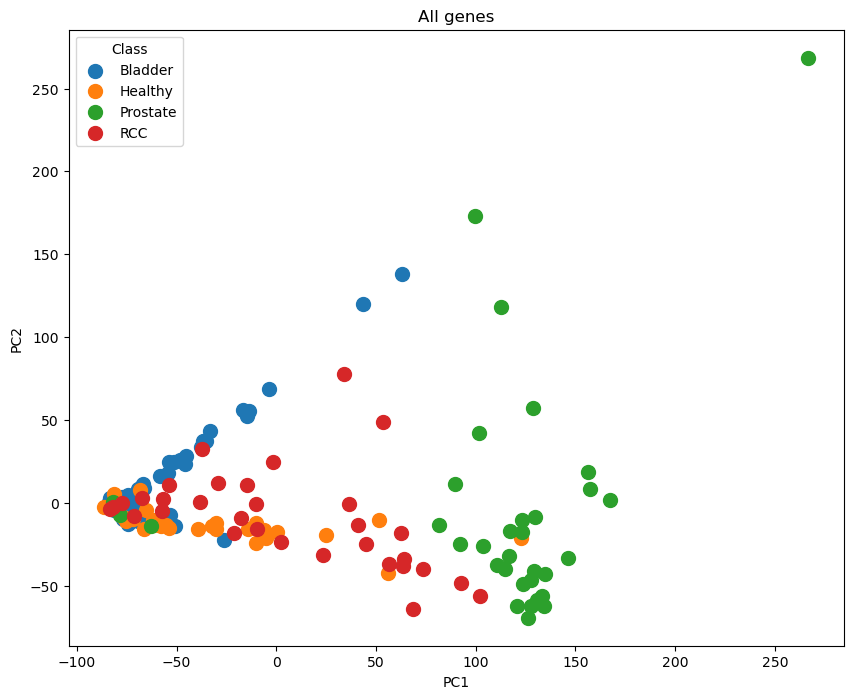

In [10]:
plot_pca(cfRNA_batch1_healthy,  'All genes')

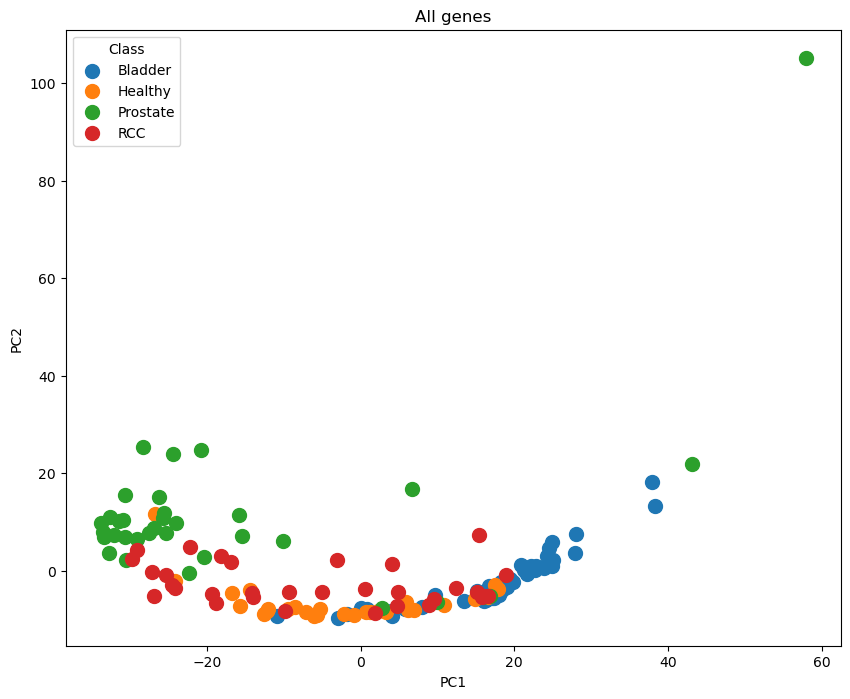

In [11]:
plot_pca(get_most_variable_genes(cfRNA_batch1_healthy,n_genes=1000),  'All genes')

In [12]:
def log_transform_and_standardize(df, target_column='target'):
    """
    Log-transforms and standardizes features, excluding the target column.
    """
    # Separate features and target
    features = df.drop(columns=[target_column])
    target = df[target_column]

    # Log transformation
    log_features = features.applymap(lambda x: np.log2(x + 1))

    # Standardization
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(log_features)

    # Convert back to DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)

    # Add the target back
    scaled_df[target_column] = target

    return scaled_df

In [13]:
cfRNA_batch1_healthy_standardized = log_transform_and_standardize(cfRNA_batch1_healthy)
cfRNA_batch2_healthy_standardized = log_transform_and_standardize(cfRNA_batch2_healthy)

LOOCV Accuracy: 0.6736


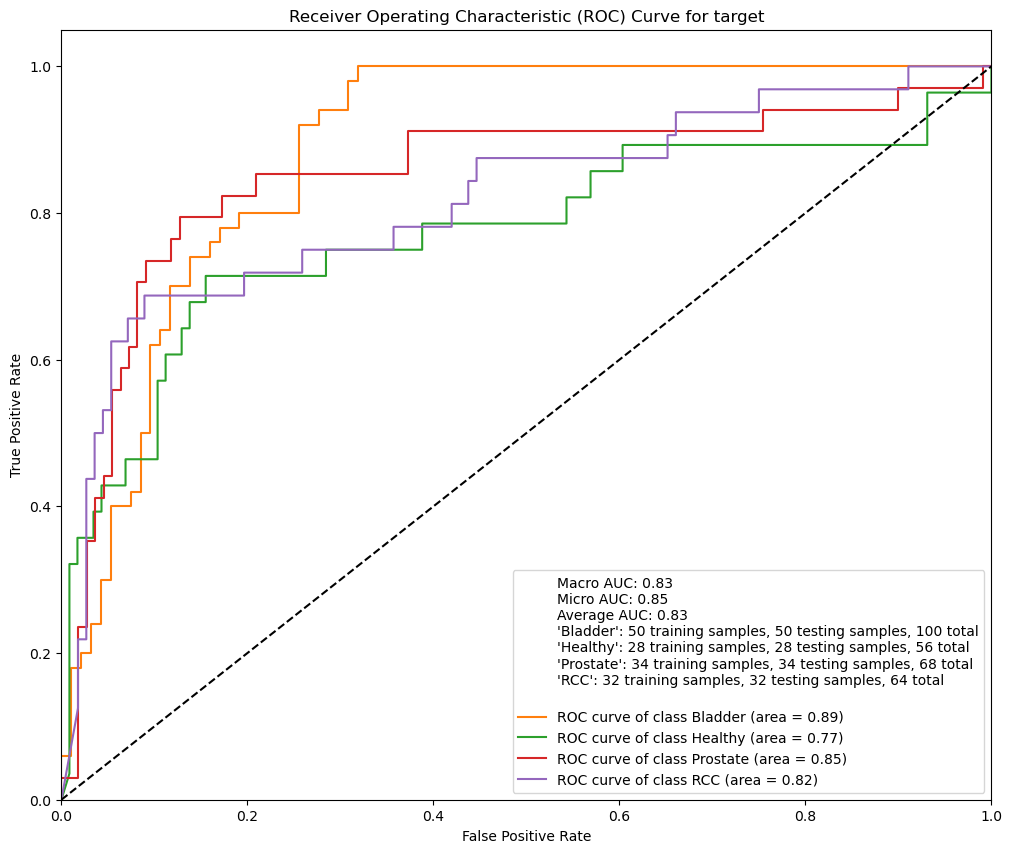

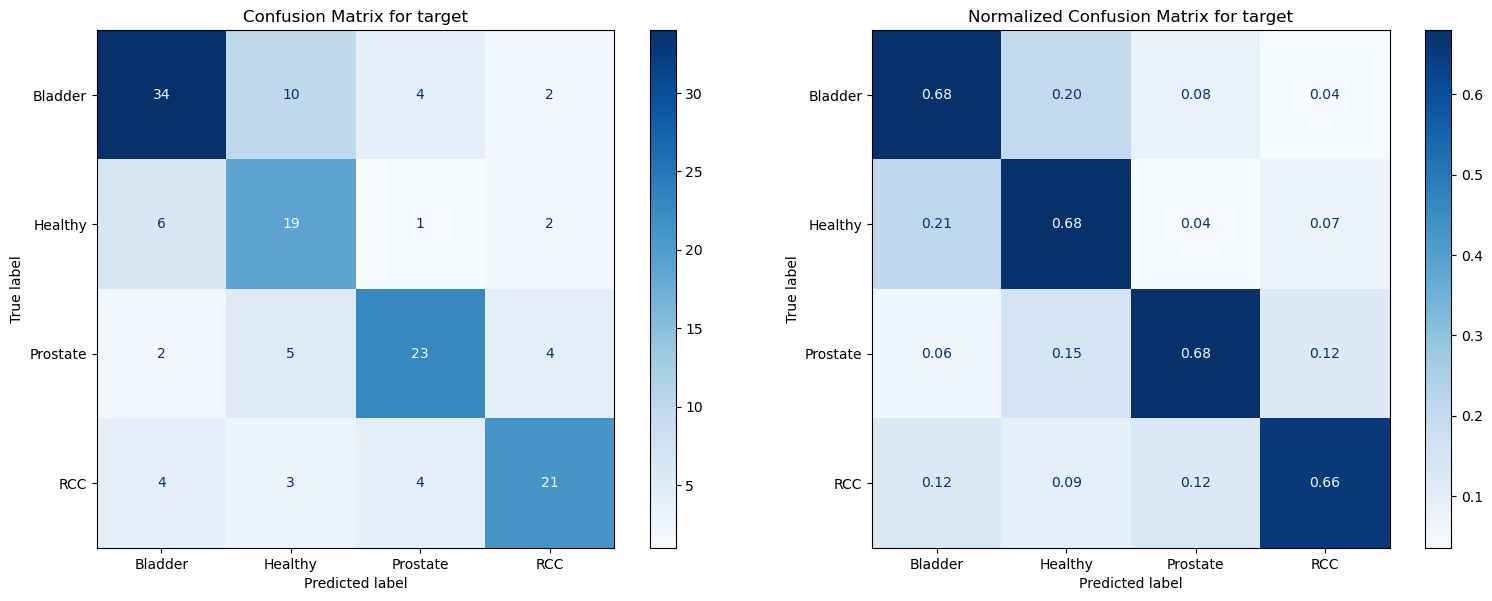

Final model trained on train_df with LOOCV Accuracy: 0.6736


In [14]:



# Test the train_model_loocv function
cfRNA_batch1_healthy_LOOCV_model, cfRNA_batch1_healthy_LOOCV_accuracy = models.train_model_loocv(get_most_variable_genes(cfRNA_batch1_healthy,n_genes=1000), target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced',max_iter=1000))

# Print the results
print(f"Final model trained on train_df with LOOCV Accuracy: {cfRNA_batch1_healthy_LOOCV_accuracy:.4f}")

LOOCV Accuracy: 0.7292


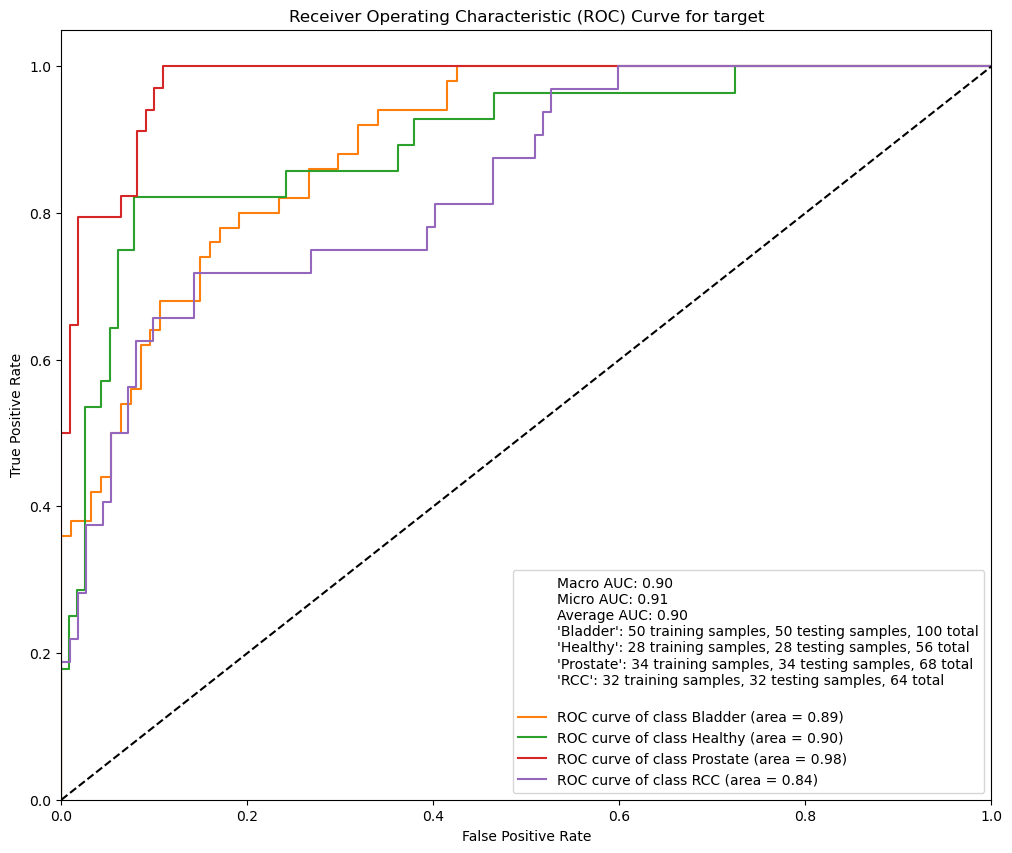

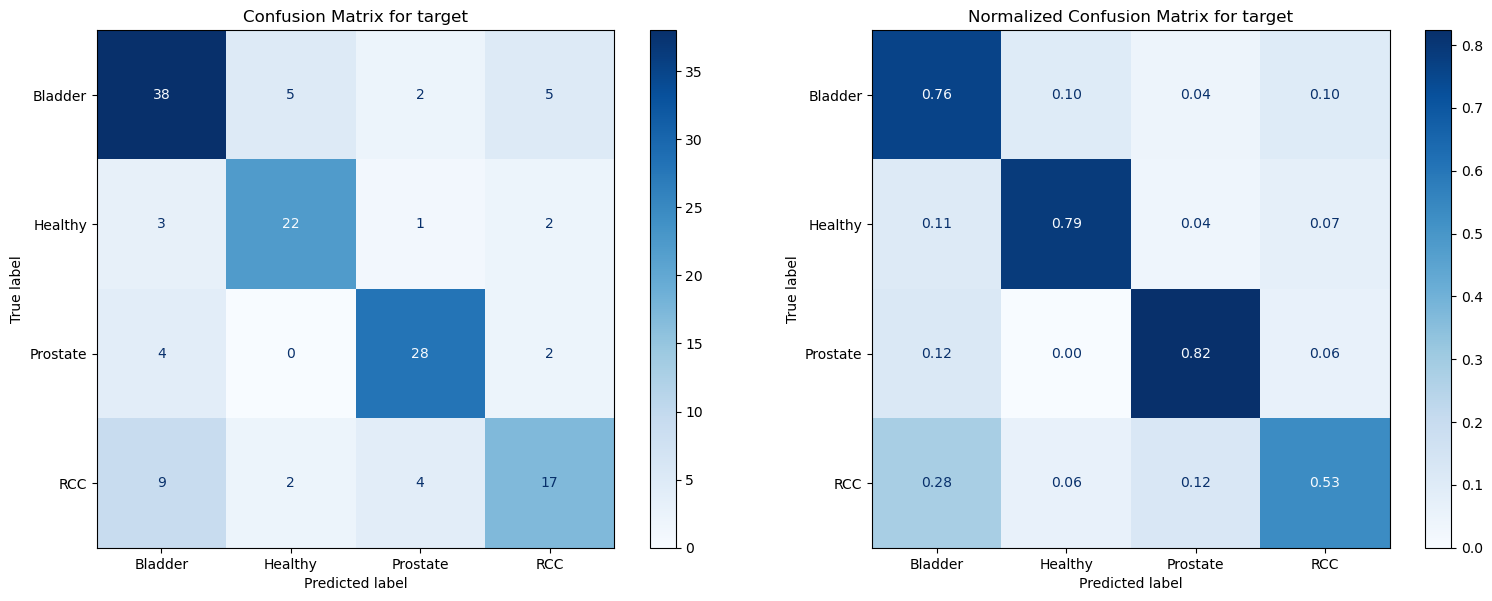

Final model trained on train_df with LOOCV Accuracy: 0.7292


In [15]:


# Test the train_model_loocv function
cfRNA_batch1_healthy_standardized_LOOCV_model, cfRNA_batch1_healthy_standardized_LOOCV_accuracy = models.train_model_loocv(get_most_variable_genes(cfRNA_batch1_healthy_standardized ,n_genes=1000), target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced',max_iter=1000))

# Print the results
print(f"Final model trained on train_df with LOOCV Accuracy: {cfRNA_batch1_healthy_standardized_LOOCV_accuracy:.4f}")

LOOCV Accuracy: 0.7000


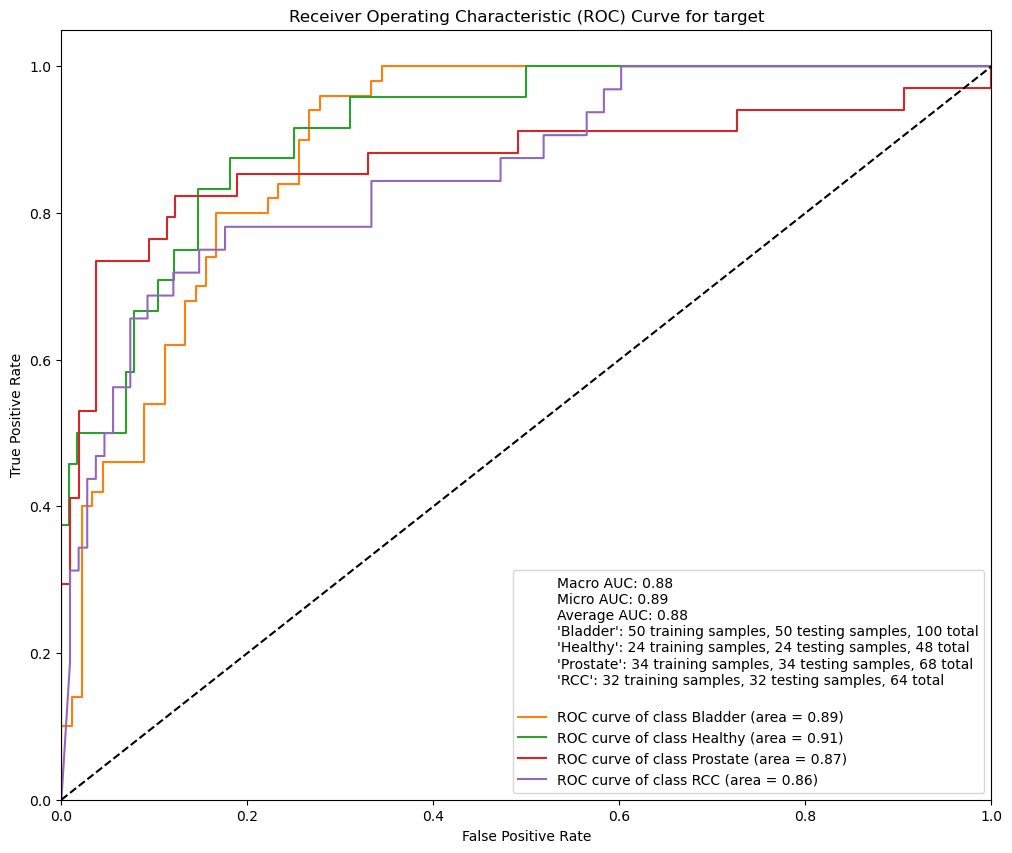

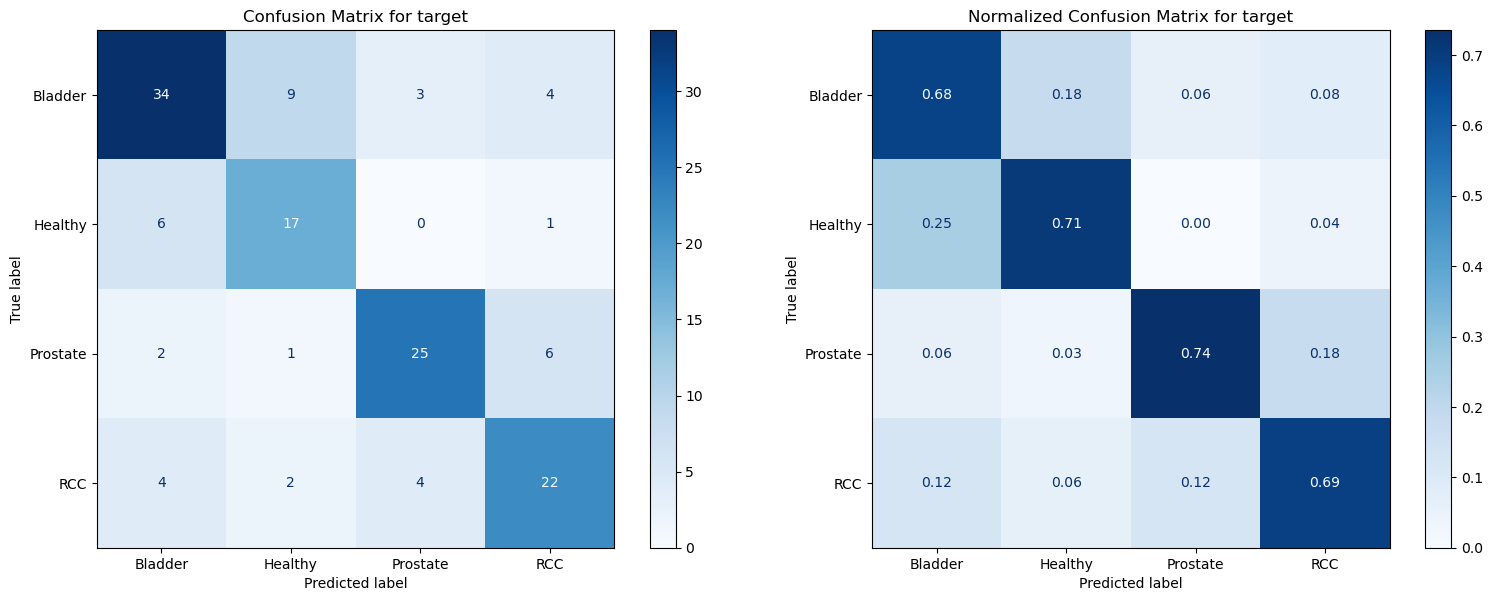

Final model trained on train_df with LOOCV Accuracy: 0.7000


In [16]:



# Test the train_model_loocv function
cfRNA_batch2_healthy_LOOCV_model, cfRNA_batch2_healthy_LOOCV_accuracy = models.train_model_loocv(get_most_variable_genes(cfRNA_batch2_healthy,n_genes=1000), target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced',max_iter=1000))

# Print the results
print(f"Final model trained on train_df with LOOCV Accuracy: {cfRNA_batch2_healthy_LOOCV_accuracy:.4f}")

LOOCV Accuracy: 0.6929


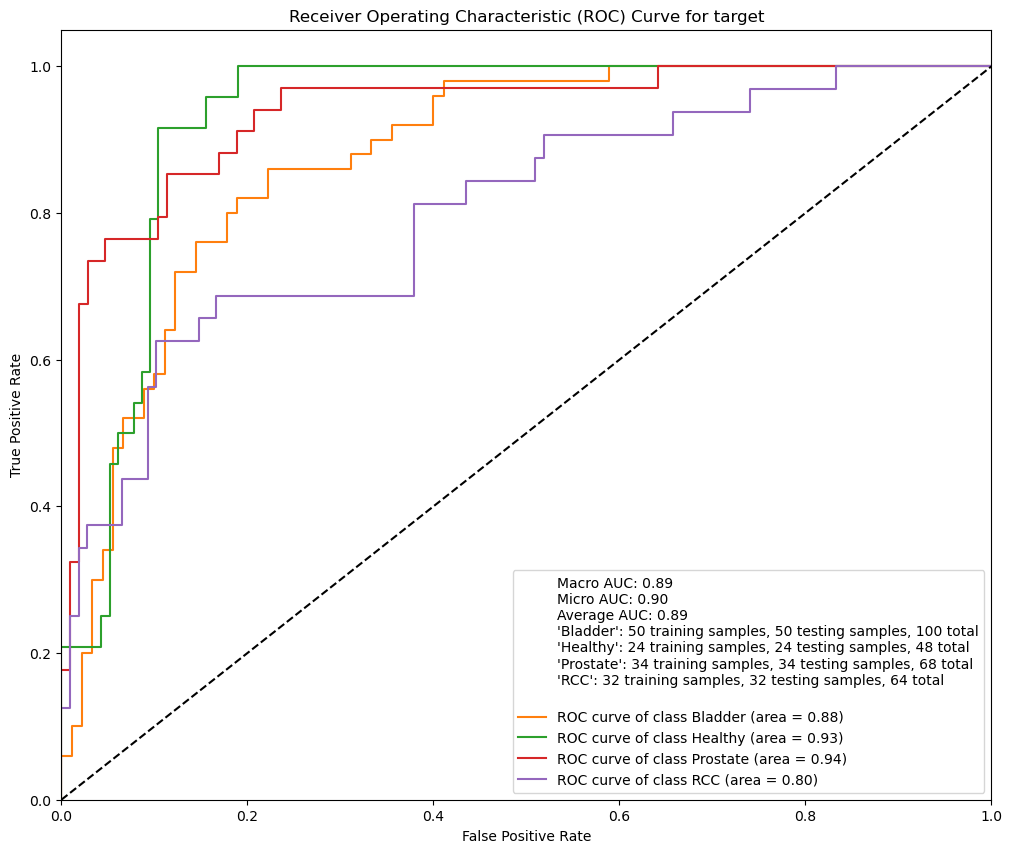

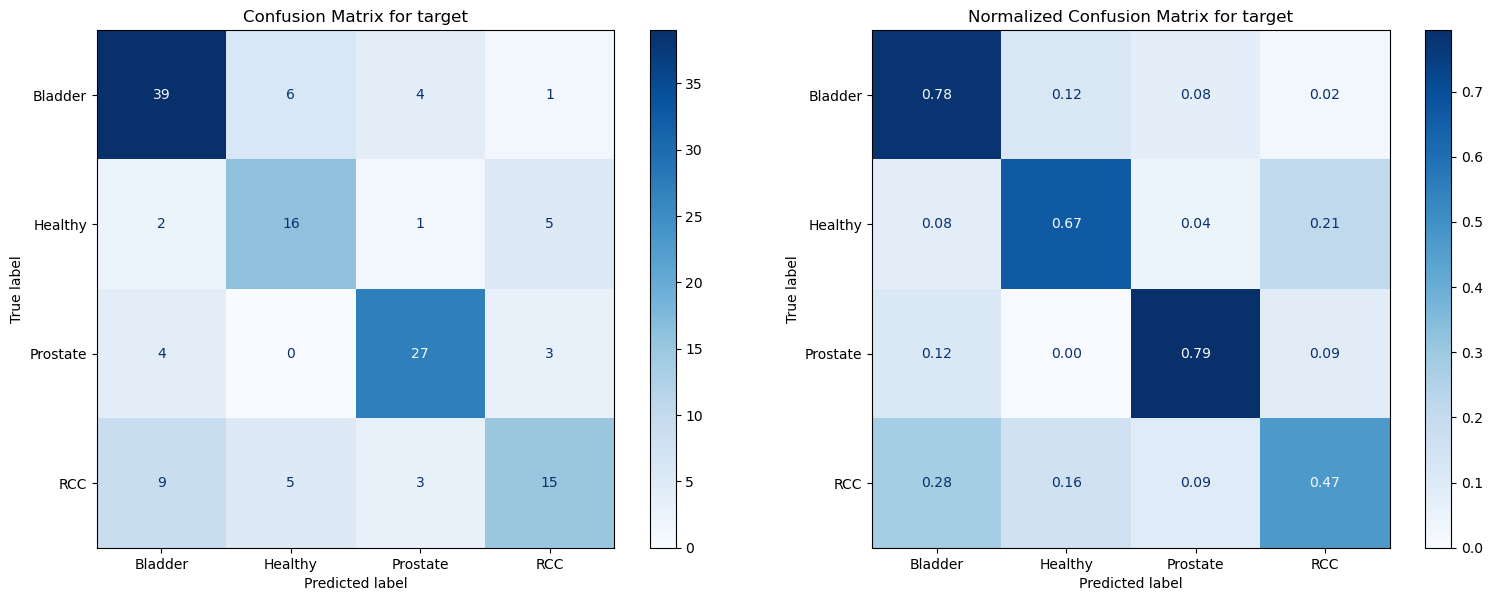

Final model trained on train_df with LOOCV Accuracy: 0.6929


In [17]:

# Test the train_model_loocv function
cfRNA_batch2_healthy_standardized_LOOCV_model, cfRNA_batch2_healthy_standardized_LOOCV_accuracy = models.train_model_loocv(get_most_variable_genes(cfRNA_batch2_healthy_standardized ,n_genes=1000), target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced',max_iter=1000))

# Print the results
print(f"Final model trained on train_df with LOOCV Accuracy: {cfRNA_batch2_healthy_standardized_LOOCV_accuracy:.4f}")